In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import statsmodels
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('dataset/Train.csv')
test = pd.read_csv('dataset/Test.csv')

In [3]:
train_org = train.copy()
test_org = test.copy()

In [4]:
train_org.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
test_org['Datetime'] = pd.to_datetime(test_org.Datetime,format='%d-%m-%Y %H:%M')
train_org['Datetime'] = pd.to_datetime(train_org.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [9]:
 train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [10]:
for i in (test, train, test_org, train_org):
    i['Year'] = i.Datetime.dt.year
    i['Month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [11]:
test.head()

,ID,Datetime,Year,Month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [12]:
train['day of the week'] = train.Datetime.dt.dayofweek

In [13]:
train.head()

,ID,Datetime,Count,Year,Month,day,Hour,day of the week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [14]:
temp = train['Datetime']

In [15]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train.Datetime.apply(applyer)
train['weekend'] = temp2

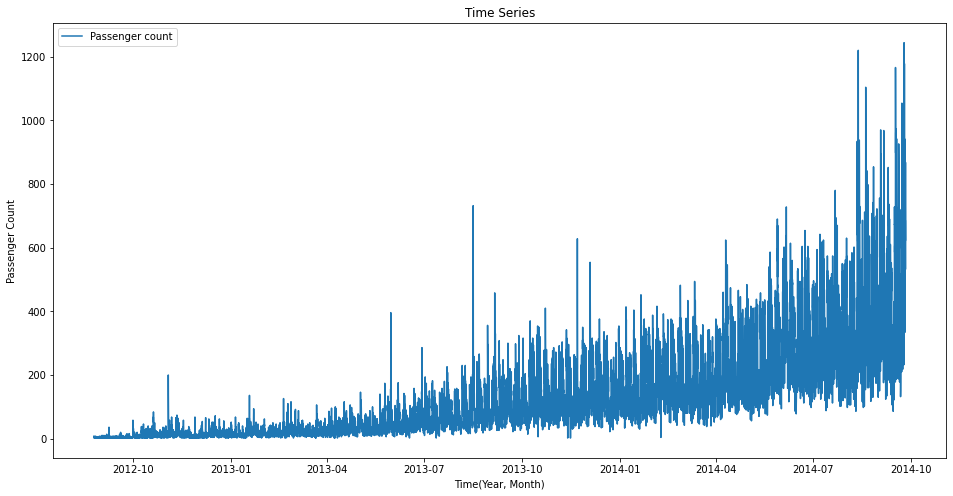

In [16]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize=(16, 8))
plt.plot(ts, label='Passenger count')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("Passenger Count")
plt.legend(loc='best')


## Exploratory Data Analysis

<AxesSubplot:xlabel='Year'>

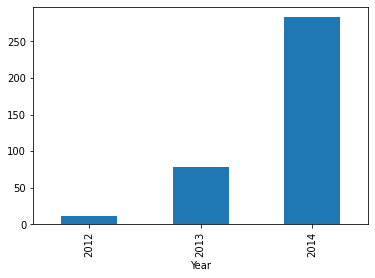

In [19]:
train.groupby('Year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Datetime'>

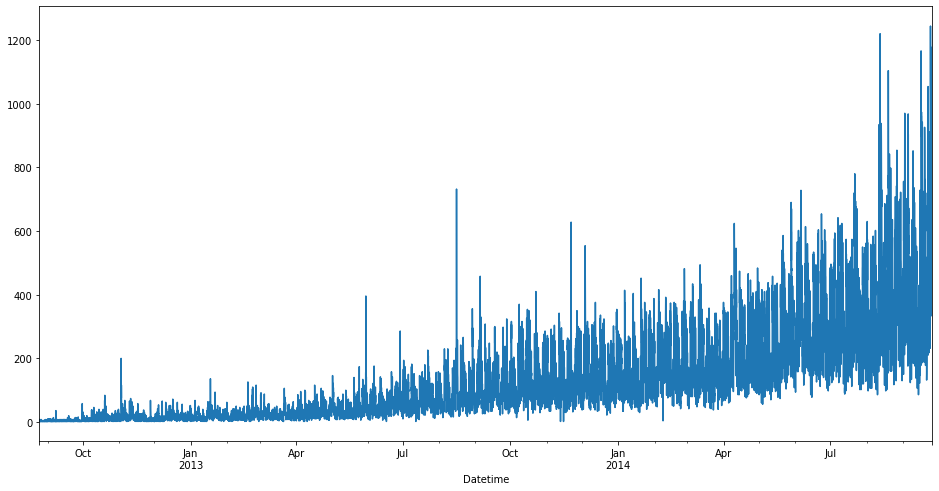

In [20]:
plt.figure(figsize = (16,8))
train['Count'].plot()

<AxesSubplot:xlabel='Month'>

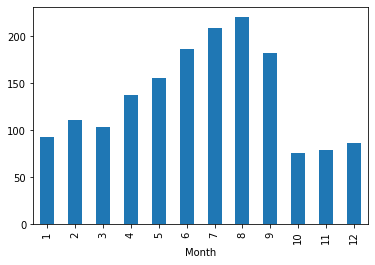

In [21]:
train.groupby('Month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'passenger count (Monthwise)'}, xlabel='Year,Month'>

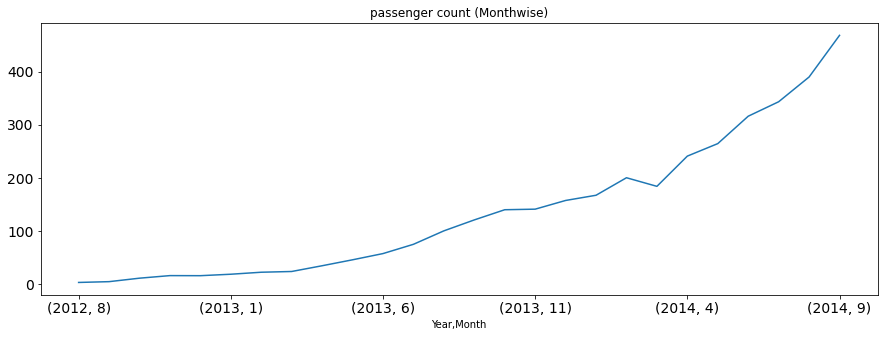

In [22]:
temp = train.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize = (15,5), title = 'passenger count (Monthwise)', fontsize = 14)

<AxesSubplot:xlabel='day'>

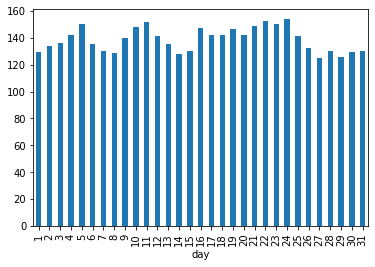

In [23]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

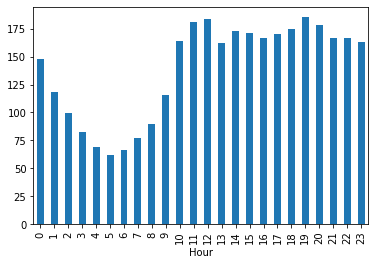

In [24]:
train.groupby('Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

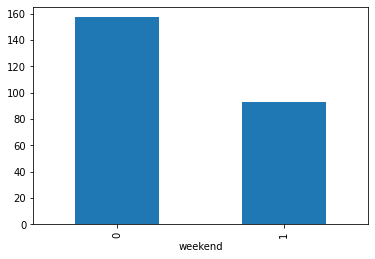

In [25]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of the week'>

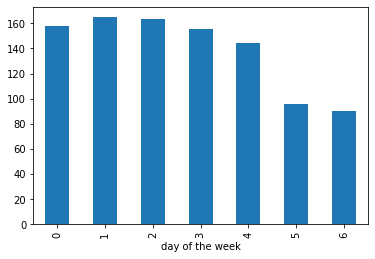

In [26]:
train.groupby('day of the week')['Count'].mean().plot.bar()

In [27]:
train.head()

,ID,Datetime,Count,Year,Month,day,Hour,day of the week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [28]:
train = train.drop('ID', axis=1)

In [29]:
train.timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.timestamp

#hourly time series
hourly = train.resample('H').mean()

#converting to daily mean
daily = train.resample('D').mean()

#converting to weekly mean
weekly = train.resample('W').mean()

#converting to monthly mean
monthly = train.resample('M').mean()

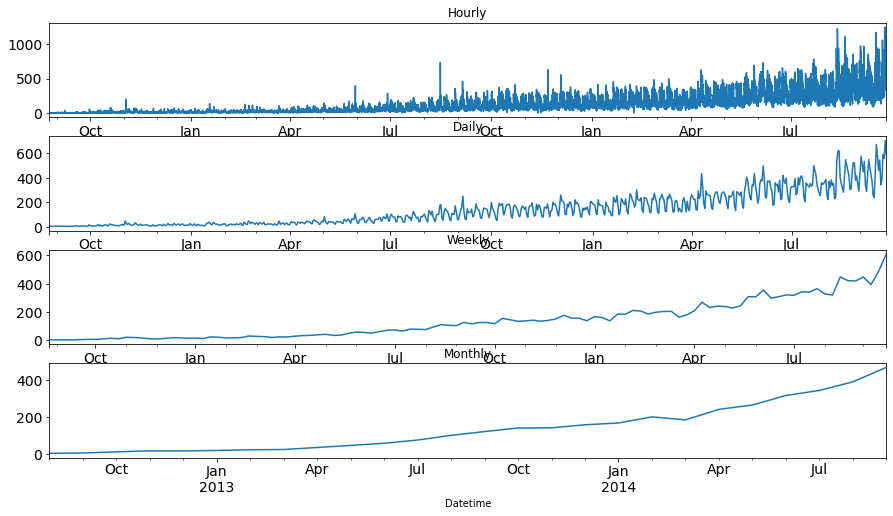

In [30]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize = (15,8), title = 'Hourly', fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax = axs[3])
plt.show()

In [37]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [38]:
# Splitting train and validation data
Train = train.ix['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

AttributeError: 'DataFrame' object has no attribute 'ix'